# Import and explore data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/christianaranguren/Documents/Phyron Practice/G. Project - Net Pay Prediction/Petrophysical_Evaluation_ML/Data_2.csv")
df.head(3)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale,PHIE,Sw,PERM
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.8898,0.0001,1.0,0.0
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.4875,0.0001,1.0,0.0
2,Well-01,2191.0,75.4375,5.7865,5.4365,1.9648,0.4347,0.3585,0.0001,1.0,0.0


In [2]:
df.shape

(5769, 11)

In [3]:
df.describe().round(2)

,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale,PHIE,Sw,PERM
count,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00
mean,2498.17,73.44,89.45,129.99,2.46,0.28,0.44,0.07,0.80,70.62
std,166.35,36.93,270.58,530.58,0.19,0.12,0.28,0.06,0.30,191.38
min,2098.00,9.42,0.54,1.18,1.38,0.02,0.00,0.00,0.04,0.00
25%,2375.00,40.77,7.74,9.60,2.36,0.19,0.17,0.02,0.62,0.00
50%,2511.50,73.36,20.69,22.86,2.47,0.26,0.43,0.05,1.00,0.00
75%,2618.50,102.12,52.88,55.55,2.58,0.35,0.70,0.12,1.00,6.03
max,2872.50,217.09,2479.92,9296.00,3.06,0.72,1.03,0.28,1.00,1589.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 11 columns):
Well_Name    5769 non-null object
Depth        5769 non-null float64
GR           5769 non-null float64
RESD         5769 non-null float64
RESS         5769 non-null float64
RHOB         5769 non-null float64
NEUTRON      5769 non-null float64
Vshale       5769 non-null float64
PHIE         5769 non-null float64
Sw           5769 non-null float64
PERM         5769 non-null float64
dtypes: float64(10), object(1)
memory usage: 495.9+ KB


In [5]:
df['Well_Name'] = df['Well_Name'].astype('category')
df['Well_Name'].unique()

[Well-01, Well-02, Well-03, Well-04, Well-05, Well-06, Well-07]
Categories (7, object): [Well-01, Well-02, Well-03, Well-04, Well-05, Well-06, Well-07]

In [6]:
%matplotlib inline
def Make_well_logs_plot (logs):
    # Sort logs by depth
    logs = logs.sort_values(by='Depth')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(20, 6))
    ax[0].plot(logs.GR, logs.Depth, '-', color='darkgreen')
    ax[1].plot(logs.RESD, logs.Depth, '-', color='black')
    ax[1].plot(logs.RESS, logs.Depth, '-', color='magenta')
    ax[2].plot(logs.RHOB, logs.Depth, '-', color='red')
    ax[3].plot(logs.NEUTRON, logs.Depth, '-', color='darkblue')
    ax[4].plot(logs.Vshale, logs.Depth, '-', color='fuchsia')
    ax[5].plot(logs.PHIE, logs.Depth, '-', color='red')
    ax[6].plot(logs.Sw, logs.Depth, '-', color='black')
    ax[7].plot(logs.PERM, logs.Depth, '-', color='darkslategrey')
    
    for i in range(len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=5)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RESD / RESS")
    ax[1].set_xlim(logs.RESD.min(),logs.RESD.max())
    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[3].set_xlabel("NEUTRON")
    ax[3].set_xlim(logs.NEUTRON.max(),logs.NEUTRON.min())
    ax[4].set_xlabel("Vshale")
    ax[4].set_xlim(logs.Vshale.min(),logs.Vshale.max())
    ax[5].set_xlabel("PHIE")
    ax[5].set_xlim(logs.PHIE.min(),logs.PHIE.max())
    ax[6].set_xlabel("Sw")
    ax[6].set_xlim(logs.Sw.min(),logs.Sw.max())
    ax[7].set_xlabel('PERM')
    ax[7].set_xlim(logs.PERM.min(),logs.PERM.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])
    fig.suptitle('Well: %s'%logs.iloc[0]['Well_Name'], fontsize=14,y=0.94)


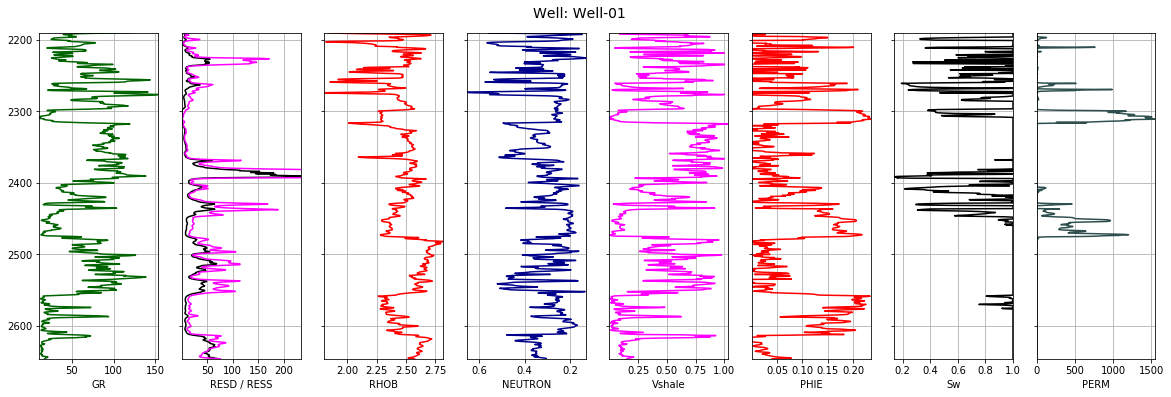

In [7]:
Make_well_logs_plot(df[df['Well_Name'] == 'Well-01'])

In [8]:
df['NEUTRON'].head()

0    0.4979
1    0.5584
2    0.4347
3    0.2779
4    0.1480
Name: NEUTRON, dtype: float64

# Create DataFrame for each target value

In [9]:
df_Vshale = df.drop(['PHIE', 'Sw', 'PERM'], axis=1)
df_Vshale.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.8898
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.4875


In [10]:
df_PHIE = df.drop(['Vshale', 'Sw', 'PERM'], axis=1)
df_PHIE.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,PHIE
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.0001
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.0001


In [11]:
df_Sw = df.drop(['Vshale', 'PHIE', 'PERM'], axis=1)
df_Sw.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Sw
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,1.0
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,1.0


In [12]:
df_PERM = df.drop(['Vshale', 'PHIE', 'Sw'], axis=1)
df_PERM.head(2)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,PERM
0,Well-01,2190.0,123.4375,5.8163,5.2970,1.8366,0.4979,0.0
1,Well-01,2190.5,95.1875,5.9865,5.2071,1.8649,0.5584,0.0


In [13]:
df.var()

Depth       27672.696547
GR           1364.017278
RESD        73215.698399
RESS       281516.679533
RHOB            0.036764
NEUTRON         0.014210
Vshale          0.080666
PHIE            0.003882
Sw              0.090995
PERM        36624.494266
dtype: float64

# Split feature - label AND Scale

In [14]:
## VSHALE

Feature_Vshale = df_Vshale.drop(["Well_Name", "Vshale", "Depth"], axis=1)
Label_Vshale = df_Vshale[["Vshale"]]

In [15]:
from sklearn.preprocessing import StandardScaler # Standardizing Data

scaler_Vshale = StandardScaler()
Vshale_scaled = pd.DataFrame(scaler_Vshale.fit_transform(Feature_Vshale), columns=Feature_Vshale.columns)
print (Vshale_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [16]:
Vshale_df = pd.concat([Vshale_scaled, Label_Vshale], axis=1, sort=False)
print (Vshale_df.head())

         GR      RESD      RESS      RHOB   NEUTRON  Vshale
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738  0.8898
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300  0.4875
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526  0.3585
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061  0.2464
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728  0.0880


In [17]:
## EFFECTIVE POROSITY

Feature_PHIE = df_PHIE.drop(["Well_Name", "PHIE", "Depth"], axis=1)
Label_PHIE = df_PHIE[["PHIE"]]

In [18]:
scaler_PHIE = StandardScaler()
PHIE_scaled = pd.DataFrame(scaler_PHIE.fit_transform(Feature_PHIE), columns=Feature_PHIE.columns)
print (PHIE_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [19]:
PHIE_df = pd.concat([PHIE_scaled, Label_PHIE], axis=1, sort=False)
print (PHIE_df.head())

         GR      RESD      RESS      RHOB   NEUTRON    PHIE
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738  0.0001
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300  0.0001
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526  0.0001
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061  0.0001
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728  0.0001


In [20]:
## WATER SATURATION

Feature_Sw = df_Sw.drop(["Well_Name", "Sw", "Depth"], axis=1)
Label_Sw = df_Sw[["Sw"]]

In [21]:
scaler_Sw = StandardScaler()
Sw_scaled = pd.DataFrame(scaler_Sw.fit_transform(Feature_Sw), columns=Feature_Sw.columns)
print (Sw_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [22]:
Sw_df = pd.concat([Sw_scaled, Label_Sw], axis=1, sort=False)
print (Sw_df.head())

         GR      RESD      RESS      RHOB   NEUTRON   Sw
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738  1.0
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300  1.0
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526  1.0
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061  1.0
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728  1.0


In [23]:
## PERMEABILITY

Feature_PERM = df_PERM.drop(["Well_Name", "PERM", "Depth"], axis=1)
Label_PERM = df_PERM[["PERM"]]

In [24]:
scaler_PERM = StandardScaler()
PERM_scaled = pd.DataFrame(scaler_PERM.fit_transform(Feature_PERM), columns=Feature_PERM.columns)
print (PERM_scaled.var())

GR         1.000173
RESD       1.000173
RESS       1.000173
RHOB       1.000173
NEUTRON    1.000173
dtype: float64


In [25]:
PERM_df = pd.concat([PERM_scaled, Label_PERM], axis=1, sort=False)
print (PERM_df.head())

         GR      RESD      RESS      RHOB   NEUTRON  PERM
0  1.353807 -0.309127 -0.235025 -3.239433  1.854738   0.0
1  0.588834 -0.308498 -0.235194 -3.091824  2.362300   0.0
2  0.054030 -0.309237 -0.234762 -2.570760  1.324526   0.0
3 -0.433387 -0.310743 -0.233986 -1.717446  0.009061   0.0
4 -0.714328 -0.310875 -0.229836 -0.261700 -1.080728   0.0


# Correlations

(0, 6)

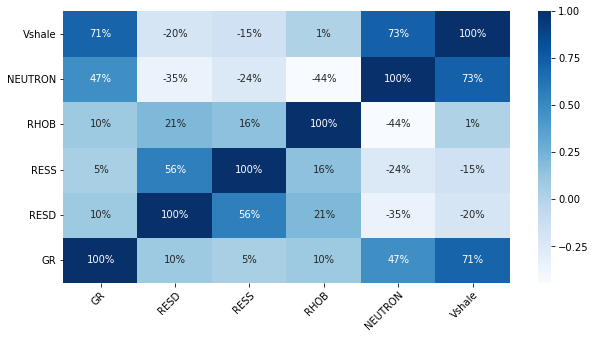

In [26]:
# Visualize correlation Vshale

%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(Vshale_df.corr(), annot=True, fmt ='.0%', cmap="Blues")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

(0, 6)

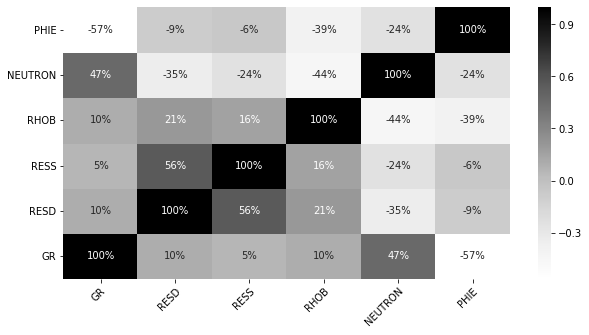

In [27]:
# Visualize correlation PHIE
%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(PHIE_df.corr(), annot=True, fmt ='.0%', cmap="Greys")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

(0, 6)

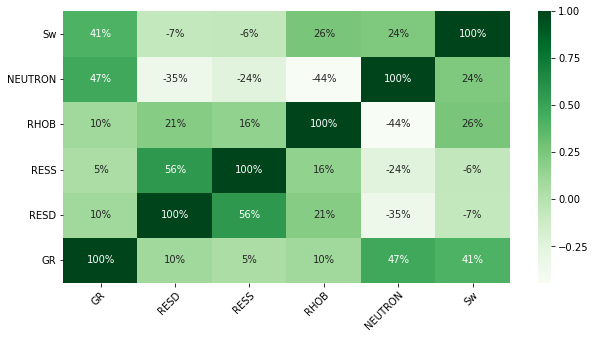

In [28]:
# Visualize correlation Sw
%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(Sw_df.corr(), annot=True, fmt ='.0%', cmap="Greens")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

(0, 6)

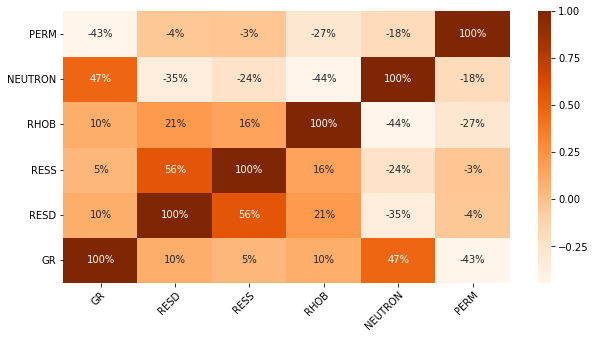

In [29]:
# Visualize correlation PERM
%matplotlib inline
plt.figure(figsize=(10,5))

ax = sns.heatmap(PERM_df.corr(), annot=True, fmt ='.0%', cmap="Oranges")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(df)-5769,6)

In [30]:
# Blind data
blind = df[df['Well_Name'] == 'Well-06']
dataset = df[df['Well_Name'] != 'Well-06']

In [103]:
blind.head(3)

,Well_Name,Depth,GR,RESD,RESS,RHOB,NEUTRON,Vshale,PHIE,Sw,PERM
3893,Well-06,2499.0,97.1458,76.549,82.543,2.595,0.139,0.6410,0.0001,1.0,0.0000
3894,Well-06,2499.5,101.0588,29.413,31.583,2.487,0.221,0.6762,0.0147,1.0,0.0003
3895,Well-06,2500.0,98.1028,12.632,13.285,2.326,0.318,0.6496,0.0186,1.0,0.0007


In [32]:
print (Vshale_df['GR'])

0       1.353807
1       0.588834
2       0.054030
3      -0.433387
4      -0.714328
          ...   
5764    0.712302
5765    0.777497
5766    0.806755
5767    0.752024
5768    0.736475
Name: GR, Length: 5769, dtype: float64


In [33]:
%matplotlib inline
def Make_Scatter_Plot_Porosity (corr):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    ax.plot(corr.NEUTRON, corr.RHOB, '.', color='darkgreen')
    ax.grid()
    ax.set_ylim(3, 1.8)
    ax.set_xlim(-0.1,0.8)
    ax.set_xlabel("NPHI")
    ax.set_ylabel("RHOB")
    
    fig.suptitle('Well: %s'%corr.iloc[0]['Well_Name'], fontsize=14,y=0.94)

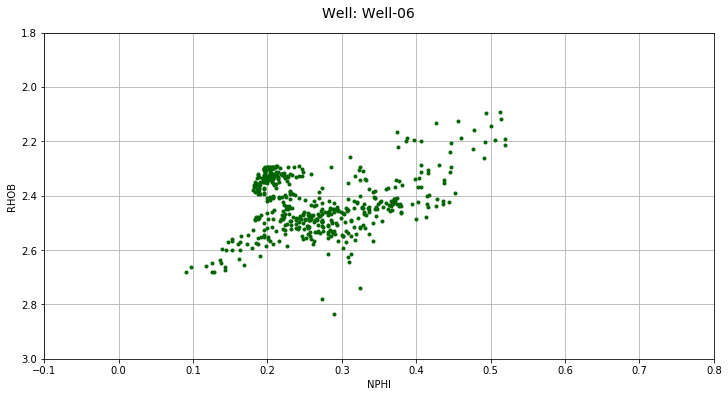

In [34]:
Make_Scatter_Plot_Porosity (df[df['Well_Name'] == 'Well-06'])

In [35]:
%matplotlib inline
def Make_Scatter_Plot_PERM (corr):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    ax.plot(corr.PHIE, corr.PERM, '.', color='darkgreen')
    ax.grid()
    ax.set_xlabel("PHIE")
    ax.set_ylabel("PERM")
    
    fig.suptitle('Well: %s'%corr.iloc[0]['Well_Name'], fontsize=14,y=0.94)

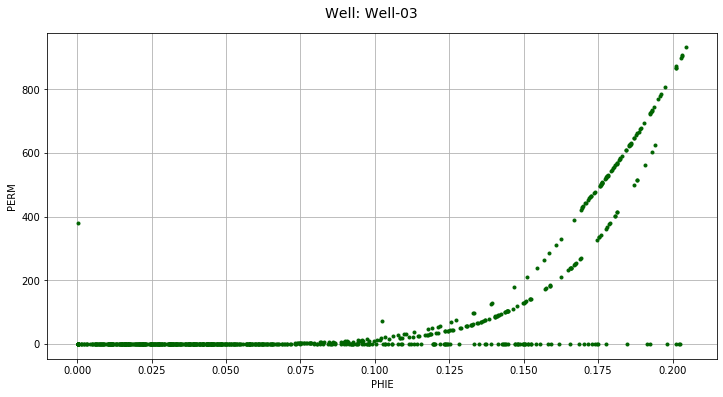

In [36]:
Make_Scatter_Plot_PERM (df[df['Well_Name'] == 'Well-03'])

# Random Forest Regressor Model

## Vshale

In [37]:
Vshale_scaled_np = Vshale_scaled.to_numpy()
Label_Vshale_np = Label_Vshale.to_numpy()

In [38]:
type(Label_Vshale_np)

numpy.ndarray

In [39]:
print (Label_Vshale_np)

[[0.8898]
 [0.4875]
 [0.3585]
 ...
 [0.8633]
 [0.9036]
 [0.8941]]


In [40]:
from sklearn.ensemble import RandomForestRegressor # RANDOM FOREST REGRESSOR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split (Vshale_scaled_np, Label_Vshale_np, test_size=0.2, random_state=1111)

rf_Vshale = RandomForestRegressor(bootstrap = True, max_depth = 17, min_samples_leaf = 3, n_estimators = 1000)
rf_Vshale.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
Vshale_pred = rf_Vshale.predict(X_test)

In [42]:
X_test.shape

(1154, 5)

In [43]:
print (MSE(y_test, Vshale_pred)**(1/2))

0.09739340635125814


In [44]:
type(Vshale_pred)

numpy.ndarray

In [45]:
type(y_test)

numpy.ndarray

In [46]:
Vshale_predict = pd.DataFrame(data=Vshale_pred, columns=["Vshale_pred"])
print(Vshale_predict)

      Vshale_pred
0        0.706438
1        0.102498
2        0.790190
3        0.788872
4        0.791615
...           ...
1149     0.479124
1150     0.019143
1151     0.898142
1152     0.708359
1153     0.029157

[1154 rows x 1 columns]


In [47]:
Vshale_real = pd.DataFrame(data=y_test, columns=["Vshale_real"])
print(Vshale_real)

      Vshale_real
0          0.7809
1          0.1148
2          0.7639
3          0.7550
4          0.6909
...           ...
1149       0.3650
1150       0.0471
1151       0.9600
1152       0.6756
1153       0.0238

[1154 rows x 1 columns]


# BLIND TEST

## Vshale

In [48]:
y_blind_Vshale = blind['Vshale'].values
y_blind_Vshale.shape

(503,)

In [49]:
X_blind_Vshale = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_Vshale.shape

(503, 5)

In [50]:
X_blind_scaler_Vshale = StandardScaler()
Vshale_X_blind_np = X_blind_scaler_Vshale.fit_transform(X_blind_Vshale)
type(Vshale_X_blind_np)

numpy.ndarray

In [51]:
yhat_blind_Vshale = rf_Vshale.predict(Vshale_X_blind_np)
yhat_blind_Vshale.shape

(503,)

In [52]:
Vshale_real = pd.DataFrame(data=y_blind_Vshale, columns=["Vshale_real"])
print(Vshale_real)

     Vshale_real
0         0.6410
1         0.6762
2         0.6496
3         0.6128
4         0.5652
..           ...
498       0.3380
499       0.3519
500       0.3664
501       0.3616
502       0.3594

[503 rows x 1 columns]


In [53]:
Vshale_pred = pd.DataFrame(data=yhat_blind_Vshale, columns=["Vshale_pred"])
print(Vshale_pred)

     Vshale_pred
0       0.231200
1       0.579945
2       0.551139
3       0.556145
4       0.564589
..           ...
498     0.262897
499     0.261071
500     0.247733
501     0.246489
502     0.262797

[503 rows x 1 columns]


In [54]:
Depth_Vshale = blind['Depth'].values 
Depth_Vshale.shape

(503,)

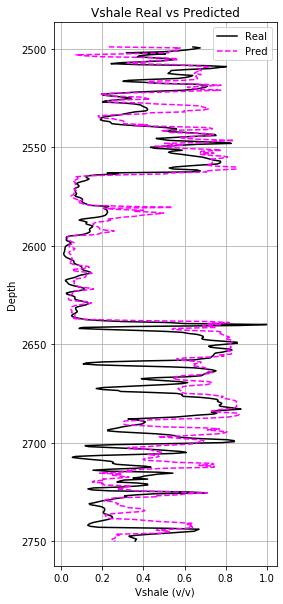

In [55]:
plt.figure (figsize=(4,10))
plt.plot(Vshale_real, Depth_Vshale, c='black')
plt.plot(Vshale_pred, Depth_Vshale, c='magenta', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('Vshale Real vs Predicted')
plt.xlabel('Vshale (v/v)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

# Random Forest Regressor Model

## Effective Porosity

In [56]:
PHIE_scaled_np = PHIE_scaled.to_numpy()
Label_PHIE_np = Label_PHIE.to_numpy()

In [57]:
type(PHIE_scaled_np)

numpy.ndarray

In [58]:
print (Label_PHIE_np)

[[0.0001]
 [0.0001]
 [0.0001]
 ...
 [0.022 ]
 [0.0201]
 [0.021 ]]


In [59]:
X_train, X_test, y_train, y_test = train_test_split (PHIE_scaled_np, Label_PHIE_np, test_size=0.2, random_state=1111)

rf_PHIE = RandomForestRegressor(bootstrap = True, max_depth = 19, min_samples_leaf = 3, n_estimators = 200)
rf_PHIE.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [60]:
PHIE_pred = rf_PHIE.predict(X_test)

In [61]:
print (MSE(y_test, PHIE_pred)**(1/2))

0.029990372243966026


# BLIND TEST

# Effective Porosity

In [62]:
y_blind_PHIE = blind['PHIE'].values
y_blind_PHIE.shape

(503,)

In [63]:
X_blind_PHIE = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_PHIE.shape

(503, 5)

In [64]:
X_blind_scaler_PHIE = StandardScaler()
PHIE_X_blind_np = X_blind_scaler_PHIE.fit_transform(X_blind_PHIE)
type(PHIE_X_blind_np)

numpy.ndarray

In [65]:
yhat_blind_PHIE = rf_PHIE.predict(PHIE_X_blind_np)
yhat_blind_PHIE.shape

(503,)

In [66]:
PHIE_real = pd.DataFrame(data=y_blind_PHIE, columns=["PHIE_real"])
print(PHIE_real)

     PHIE_real
0       0.0001
1       0.0147
2       0.0186
3       0.0233
4       0.0277
..         ...
498     0.0670
499     0.0749
500     0.0759
501     0.0761
502     0.0749

[503 rows x 1 columns]


In [67]:
PHIE_pred = pd.DataFrame(data=yhat_blind_PHIE, columns=["PHIE_pred"])
print(PHIE_pred)

     PHIE_pred
0     0.016181
1     0.066201
2     0.089191
3     0.101450
4     0.098512
..         ...
498   0.046399
499   0.046911
500   0.048169
501   0.048863
502   0.048859

[503 rows x 1 columns]


In [68]:
Depth_PHIE = blind['Depth'].values 
Depth_PHIE.shape

(503,)

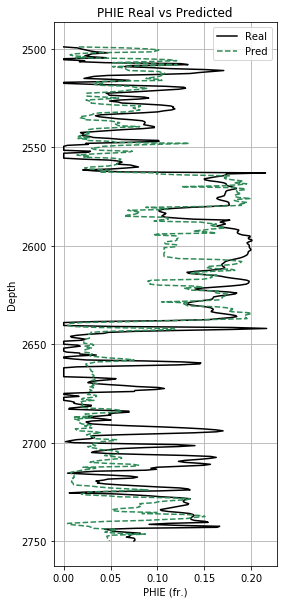

In [69]:
plt.figure (figsize=(4,10))
plt.plot(PHIE_real, Depth_PHIE, c='black')
plt.plot(PHIE_pred, Depth_PHIE, c='seagreen', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('PHIE Real vs Predicted')
plt.xlabel('PHIE (fr.)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

# Random Forest Regressor Model

## Water Saturation

In [70]:
Sw_scaled_np = Sw_scaled.to_numpy()
Label_Sw_np = Label_Sw.to_numpy()

In [71]:
type(Sw_scaled_np)

numpy.ndarray

In [72]:
print (Label_Sw_np)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [73]:
X_train, X_test, y_train, y_test = train_test_split (Sw_scaled_np, Label_Sw_np, test_size=0.2, random_state=1111)

rf_Sw = RandomForestRegressor(bootstrap = True, max_depth = 15, min_samples_leaf = 3, n_estimators = 1000)
rf_Sw.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
Sw_pred = rf_Sw.predict(X_test)

In [75]:
print (MSE(y_test, Sw_pred)**(1/2))

0.15546566515937318


# BLIND TEST

## Water Saturation

In [76]:
y_blind_Sw = blind['Sw'].values
y_blind_Sw.shape

(503,)

In [77]:
X_blind_Sw = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_Sw.shape

(503, 5)

In [78]:
X_blind_scaler_Sw = StandardScaler()
Sw_X_blind_np = X_blind_scaler_Sw.fit_transform(X_blind_Sw)
type(Sw_X_blind_np)

numpy.ndarray

In [79]:
yhat_blind_Sw = rf_Sw.predict(Sw_X_blind_np)
yhat_blind_Sw.shape

(503,)

In [80]:
Sw_real = pd.DataFrame(data=y_blind_Sw, columns=["Sw_real"])
print(Sw_real)

     Sw_real
0     1.0000
1     1.0000
2     1.0000
3     1.0000
4     1.0000
..       ...
498   0.7414
499   0.6296
500   0.5724
501   0.5394
502   0.5376

[503 rows x 1 columns]


In [81]:
Sw_pred = pd.DataFrame(data=yhat_blind_Sw, columns=["Sw_pred"])
print(Sw_pred)

      Sw_pred
0    0.990786
1    0.980768
2    0.985348
3    0.991945
4    0.992663
..        ...
498  0.788842
499  0.775224
500  0.763608
501  0.768027
502  0.717455

[503 rows x 1 columns]


In [82]:
Depth_Sw = blind['Depth'].values 
Depth_Sw.shape

(503,)

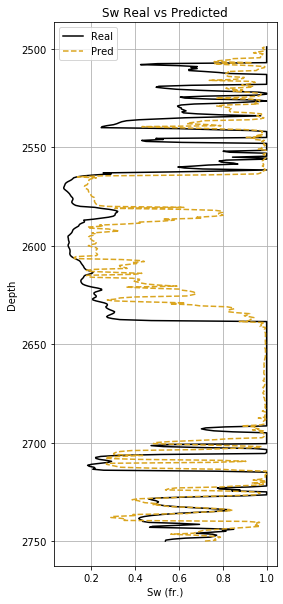

In [83]:
plt.figure (figsize=(4,10))
plt.plot(Sw_real, Depth_PHIE, c='black')
plt.plot(Sw_pred, Depth_PHIE, c='goldenrod', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('Sw Real vs Predicted')
plt.xlabel('Sw (fr.)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

# Random Forest Regressor Model

## Permeability

In [84]:
PERM_scaled_np = PERM_scaled.to_numpy()
Label_PERM_np = Label_PERM.to_numpy()

In [85]:
type(PERM_scaled_np)

numpy.ndarray

In [86]:
print (Label_PERM_np)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [87]:
X_train, X_test, y_train, y_test = train_test_split (PERM_scaled_np, Label_PERM_np, test_size=0.2, random_state=1111)

rf_PERM = RandomForestRegressor(bootstrap = True, max_depth = 15, min_samples_leaf = 3, n_estimators = 100)
rf_PERM.fit(X_train, y_train)

/Users/christianaranguren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [88]:
PERM_pred = rf_PERM.predict(X_test)

In [89]:
print (MSE(y_test, PERM_pred)**(1/2))

93.37853314255382


# BLIND TEST

## Permeability

In [90]:
y_blind_PERM = blind['PERM'].values
y_blind_PERM.shape

(503,)

In [91]:
X_blind_PERM = blind.drop(["Well_Name", "Vshale", "Depth", "PHIE", "Sw", "PERM"], axis=1)
X_blind_PERM.shape

(503, 5)

In [92]:
X_blind_scaler_PERM = StandardScaler()
PERM_X_blind_np = X_blind_scaler_PERM.fit_transform(X_blind_PERM)
type(PERM_X_blind_np)

numpy.ndarray

In [93]:
yhat_blind_PERM = rf_PERM.predict(PERM_X_blind_np)
yhat_blind_PERM.shape

(503,)

In [94]:
PERM_real = pd.DataFrame(data=y_blind_PERM, columns=["PERM_real"])
print(PERM_real)

     PERM_real
0       0.0000
1       0.0003
2       0.0007
3       0.0017
4       0.0035
..         ...
498     1.4776
499     2.9163
500     3.1785
501     3.2255
502     2.9296

[503 rows x 1 columns]


In [95]:
PERM_pred = pd.DataFrame(data=yhat_blind_PERM, columns=["PERM_pred"])
print(PERM_pred)

      PERM_pred
0      0.001757
1     28.345216
2    111.442964
3    124.960705
4    125.612901
..          ...
498    0.255438
499    0.624396
500    0.838063
501    0.847732
502    0.859789

[503 rows x 1 columns]


In [96]:
Depth_PERM = blind['Depth'].values 
Depth_PERM.shape

(503,)

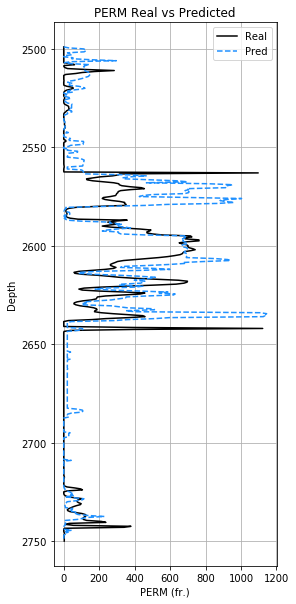

In [97]:
plt.figure (figsize=(4,10))
plt.plot(PERM_real, Depth_PERM, c='black')
plt.plot(PERM_pred, Depth_PERM, c='dodgerblue', linestyle='--')
plt.grid()
plt.gca().invert_yaxis()
plt.title('PERM Real vs Predicted')
plt.xlabel('PERM (fr.)')
plt.ylabel('Depth')
plt.legend(['Real', 'Pred'], loc=0)

In [98]:
Depth = blind['Depth']

Text(0.5, 0.94, 'Well: Well-06 Predicted vs Real')

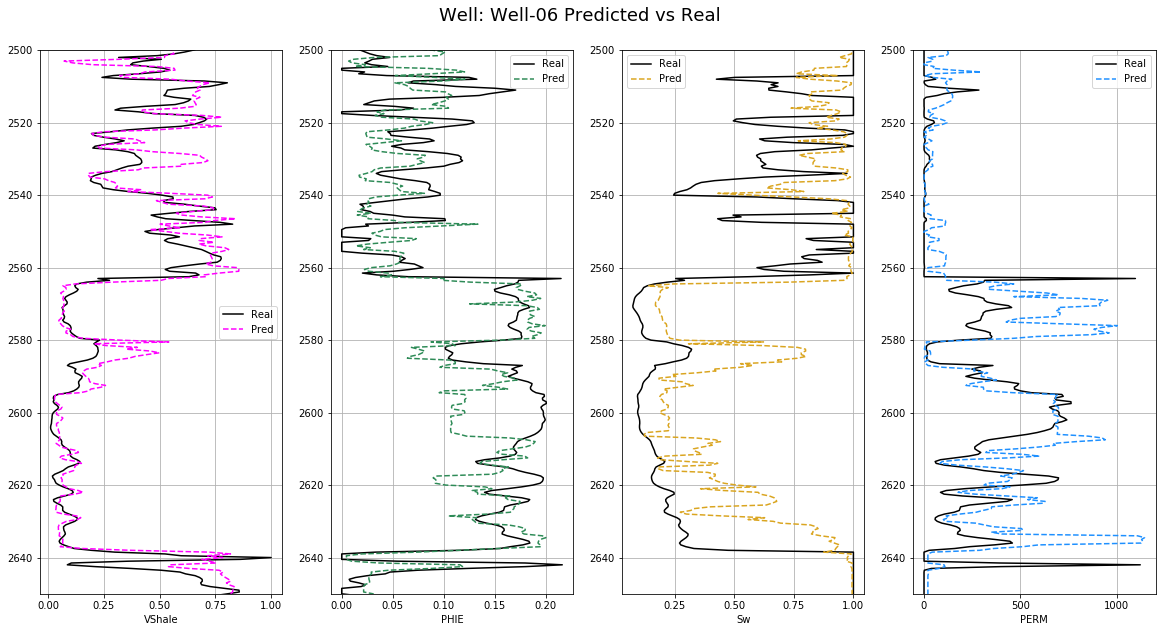

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

ax[0].plot(Vshale_real, Depth, '-', c='black')
ax[0].plot(Vshale_pred, Depth, '--', c='magenta', linestyle='--')
ax[1].plot(PHIE_real, Depth, '-', c='black')
ax[1].plot(PHIE_pred, Depth, '--', c='seagreen', linestyle='--')
ax[2].plot(Sw_real, Depth, '-', c='black')
ax[2].plot(Sw_pred, Depth, '--', c='goldenrod', linestyle='--')
ax[3].plot(PERM_real, Depth, '-', c='black')
ax[3].plot(PERM_pred, Depth, '--', c='dodgerblue', linestyle='--')

for b in range(len(ax)):
    ax[b].invert_yaxis()
    ax[b].grid()
    ax[b].locator_params(axis='x', nbins=5)
    ax[b].legend(['Real', 'Pred'], loc=0)


ax[0].set_xlabel("VShale")
ax[0].set_ylim(2650, 2500)
ax[1].set_xlabel("PHIE")
ax[1].set_ylim(2650, 2500)
ax[2].set_xlabel("Sw")
ax[2].set_ylim(2650, 2500)
ax[3].set_xlabel("PERM")
ax[3].set_ylim(2650, 2500)

fig.suptitle('Well: Well-06 Predicted vs Real', fontsize=18,y=0.94)